### House-Price Prediction

**Import required modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [2]:
data = pd.read_csv("housing.csv")

**Data Exploration**

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#REMOVE THE NULL VALUES
ndata = data.dropna()

In [6]:
ndata

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


**Train and Test**

In [8]:
from sklearn.model_selection import train_test_split

x = ndata.drop(['median_house_value'], axis =1)
y = ndata['median_house_value']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18199,-122.02,37.40,35.0,2348.0,531.0,1475.0,498.0,4.3500,<1H OCEAN,261000.0
12473,-121.47,38.58,43.0,3807.0,952.0,1484.0,850.0,2.3266,INLAND,137500.0
20030,-119.03,36.08,19.0,2471.0,431.0,1040.0,426.0,3.2500,INLAND,80600.0
2284,-119.76,36.78,30.0,6117.0,1330.0,2768.0,1224.0,2.1383,INLAND,78800.0
11462,-117.99,33.67,19.0,3808.0,790.0,1776.0,756.0,4.6250,<1H OCEAN,282200.0
...,...,...,...,...,...,...,...,...,...,...
7794,-118.08,33.89,37.0,1152.0,259.0,981.0,225.0,3.2857,<1H OCEAN,153600.0
3211,-119.66,36.34,32.0,1338.0,276.0,859.0,286.0,2.6397,INLAND,59700.0
8128,-118.16,33.79,25.0,5463.0,1265.0,3010.0,1179.0,3.2330,NEAR OCEAN,199100.0
8096,-118.21,33.81,45.0,1693.0,337.0,1255.0,333.0,3.6923,NEAR OCEAN,159700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

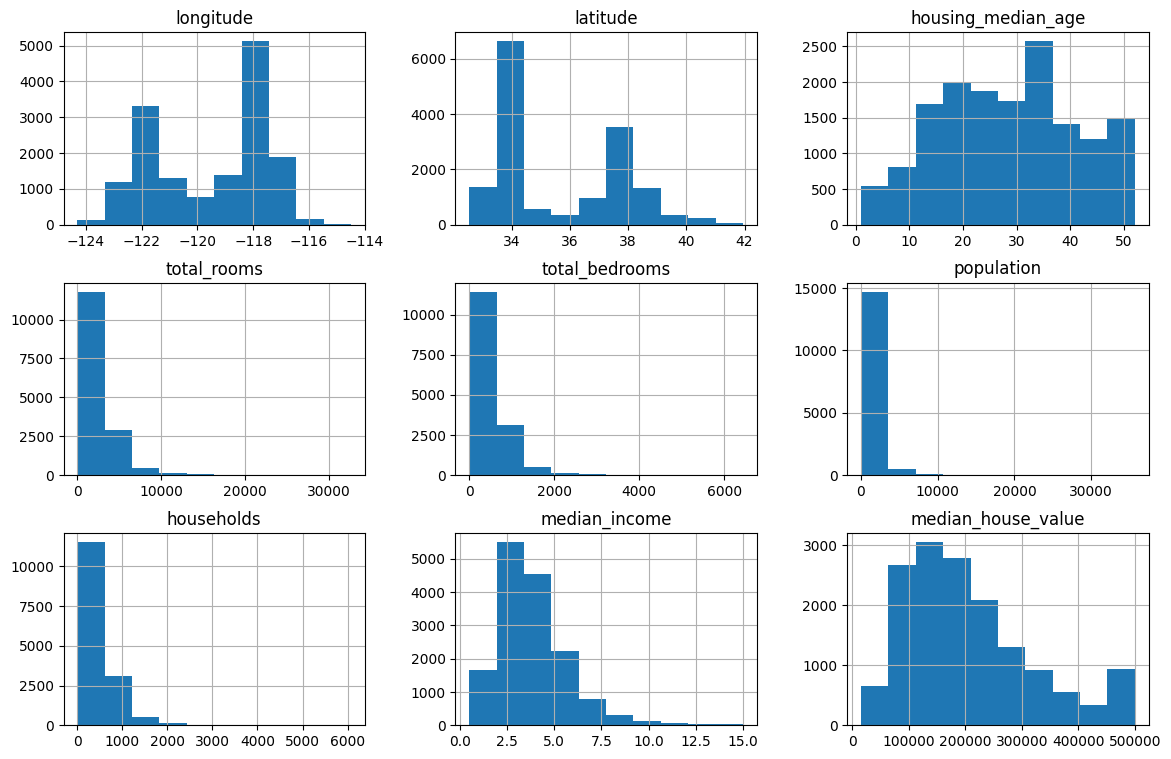

In [12]:
train_data.hist(figsize = (14,9))

In [13]:
# Selecting only the numeric columns from the DataFrame
numeric_cols = train_data.select_dtypes(include=[np.number])
# Calculating the correlation matrix
correlation_matrix = numeric_cols.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925039,-0.113266,0.053251,0.077621,0.106909,0.064000,-0.016635,-0.049518
latitude,-0.925039,1.000000,0.014434,-0.044252,-0.075441,-0.115514,-0.079173,-0.077819,-0.140428
housing_median_age,-0.113266,0.014434,1.000000,-0.362959,-0.321663,-0.293363,-0.303515,-0.119431,0.107043
total_rooms,0.053251,-0.044252,-0.362959,1.000000,0.929189,0.854391,0.917593,0.195549,0.129156
total_bedrooms,0.077621,-0.075441,-0.321663,0.929189,1.000000,0.874363,0.979284,-0.011088,0.045164
population,0.106909,-0.115514,-0.293363,0.854391,0.874363,1.000000,0.904597,0.001327,-0.030129
households,0.064000,-0.079173,-0.303515,0.917593,0.979284,0.904597,1.000000,0.010240,0.060733
median_income,-0.016635,-0.077819,-0.119431,0.195549,-0.011088,0.001327,0.010240,1.000000,0.686257
median_house_value,-0.049518,-0.140428,0.107043,0.129156,0.045164,-0.030129,0.060733,0.686257,1.000000


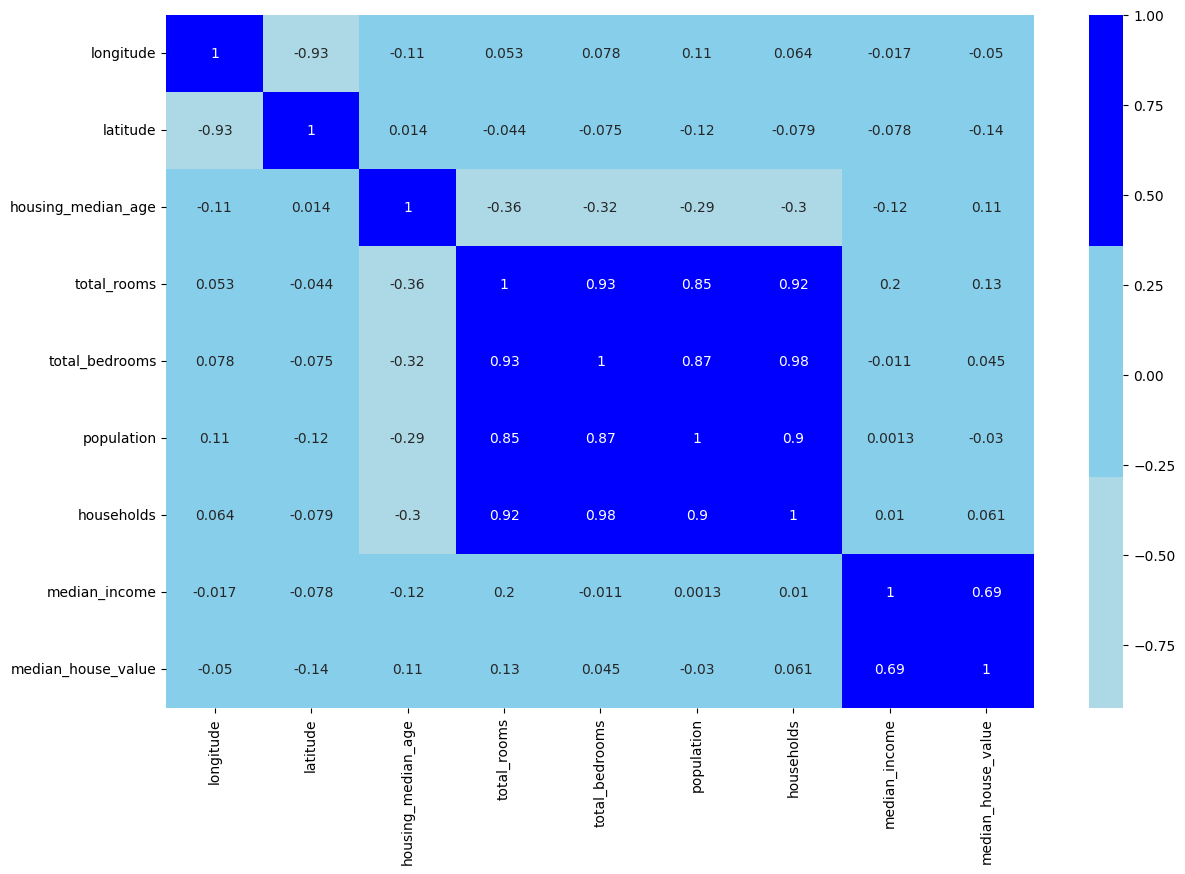

In [14]:
plt.figure(figsize=(14, 9))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(["lightblue", "skyblue", "blue"]))
plt.show()

In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

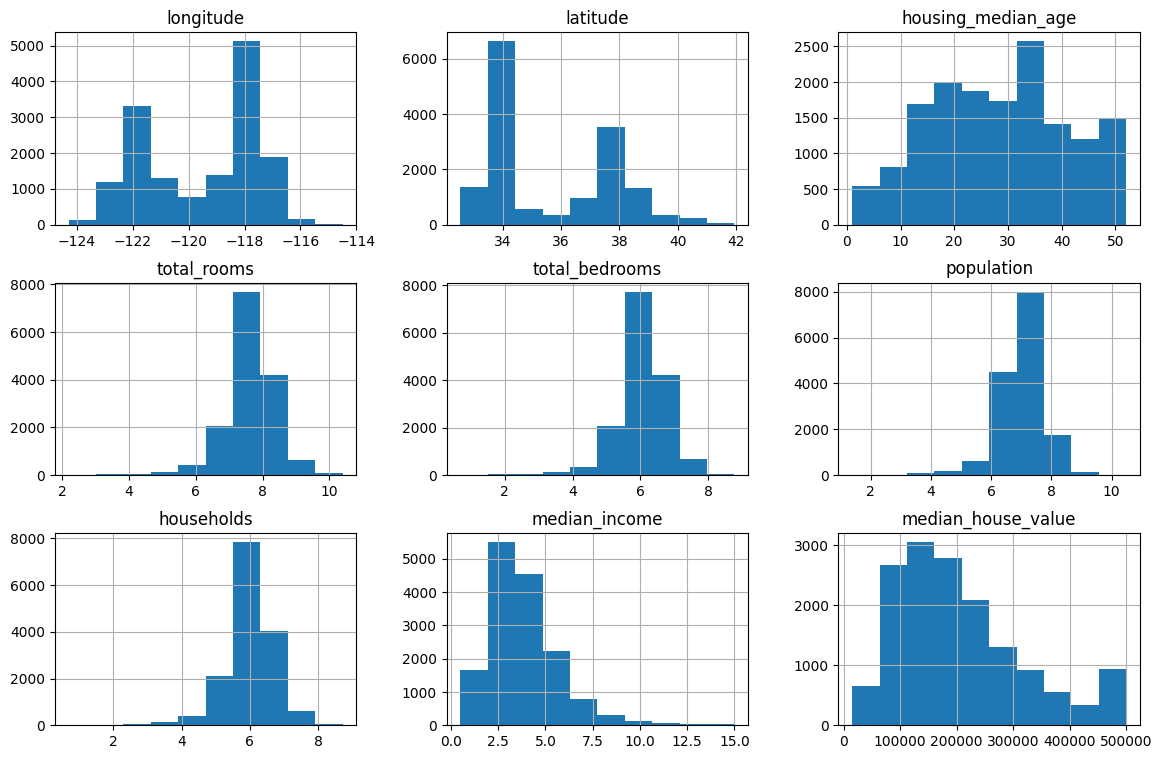

In [16]:
train_data.hist(figsize = (14,9))

**Data Preprocessing**

In [17]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6765
INLAND        4902
NEAR OCEAN    1979
NEAR BAY      1676
ISLAND           2
Name: count, dtype: int64

In [18]:
dummy_variables = pd.get_dummies(train_data['ocean_proximity']).astype(int)
print(dummy_variables.head())

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
18199          1       0       0         0           0
12473          0       1       0         0           0
20030          0       1       0         0           0
2284           0       1       0         0           0
11462          1       0       0         0           0


In [19]:
train_data = train_data.join(dummy_variables)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18199,-122.02,37.40,35.0,7.761745,6.276643,7.297091,6.212606,4.3500,<1H OCEAN,261000.0,1,0,0,0,0
12473,-121.47,38.58,43.0,8.244859,6.859615,7.303170,6.746412,2.3266,INLAND,137500.0,0,1,0,0,0
20030,-119.03,36.08,19.0,7.812783,6.068426,6.947937,6.056784,3.2500,INLAND,80600.0,0,1,0,0,0
2284,-119.76,36.78,30.0,8.718991,7.193686,7.926242,7.110696,2.1383,INLAND,78800.0,0,1,0,0,0
11462,-117.99,33.67,19.0,8.245122,6.673298,7.482682,6.629363,4.6250,<1H OCEAN,282200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,-118.08,33.89,37.0,7.050123,5.560682,6.889591,5.420535,3.2857,<1H OCEAN,153600.0,1,0,0,0,0
3211,-119.66,36.34,32.0,7.199678,5.624018,6.756932,5.659482,2.6397,INLAND,59700.0,0,1,0,0,0
8128,-118.16,33.79,25.0,8.605936,7.143618,8.010028,7.073270,3.2330,NEAR OCEAN,199100.0,0,0,0,0,1
8096,-118.21,33.81,45.0,7.434848,5.823046,7.135687,5.811141,3.6923,NEAR OCEAN,159700.0,0,0,0,0,1


In [20]:
train_data = train_data.drop('ocean_proximity', axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18199,-122.02,37.40,35.0,7.761745,6.276643,7.297091,6.212606,4.3500,261000.0,1,0,0,0,0
12473,-121.47,38.58,43.0,8.244859,6.859615,7.303170,6.746412,2.3266,137500.0,0,1,0,0,0
20030,-119.03,36.08,19.0,7.812783,6.068426,6.947937,6.056784,3.2500,80600.0,0,1,0,0,0
2284,-119.76,36.78,30.0,8.718991,7.193686,7.926242,7.110696,2.1383,78800.0,0,1,0,0,0
11462,-117.99,33.67,19.0,8.245122,6.673298,7.482682,6.629363,4.6250,282200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,-118.08,33.89,37.0,7.050123,5.560682,6.889591,5.420535,3.2857,153600.0,1,0,0,0,0
3211,-119.66,36.34,32.0,7.199678,5.624018,6.756932,5.659482,2.6397,59700.0,0,1,0,0,0
8128,-118.16,33.79,25.0,8.605936,7.143618,8.010028,7.073270,3.2330,199100.0,0,0,0,0,1
8096,-118.21,33.81,45.0,7.434848,5.823046,7.135687,5.811141,3.6923,159700.0,0,0,0,0,1


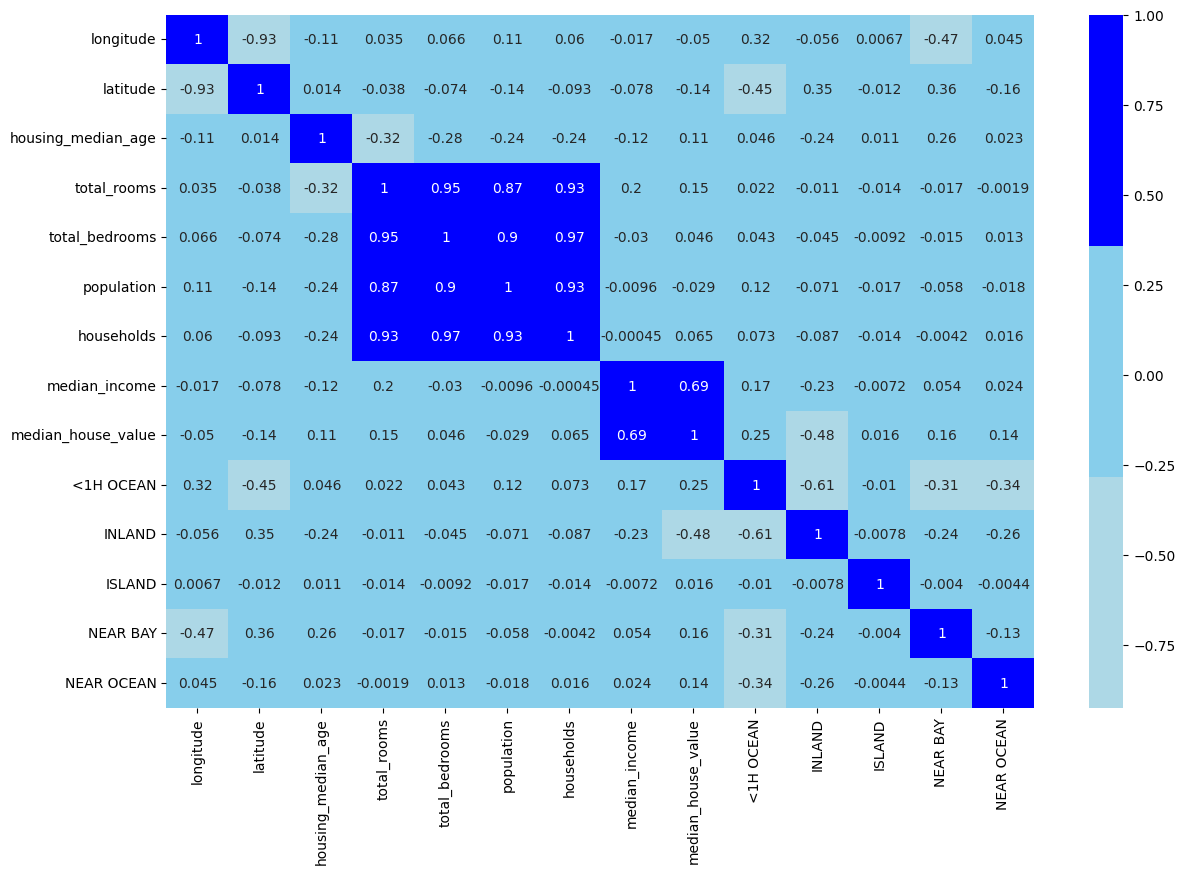

In [21]:
plt.figure(figsize=(14, 9))
sns.heatmap(train_data.corr(), annot=True, cmap=sns.color_palette(["lightblue", "skyblue", "blue"]))
plt.show()

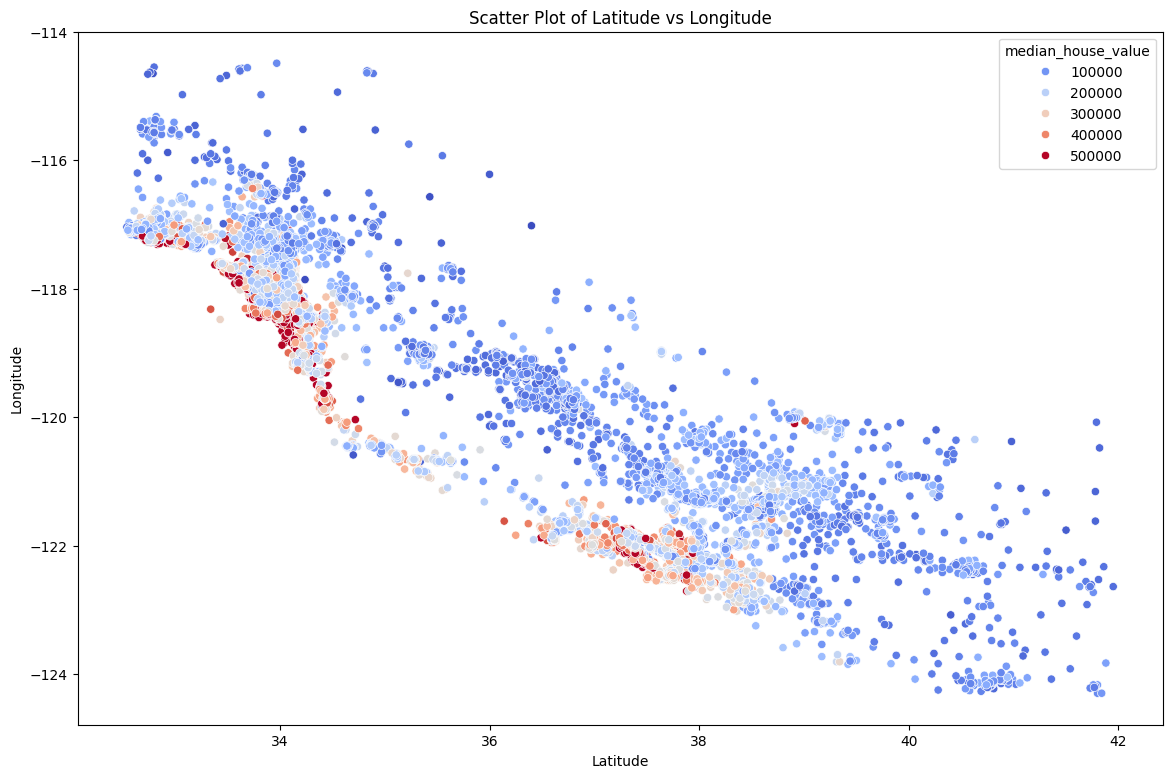

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 9))
sns.scatterplot(
    x="latitude",
    y="longitude",
    data=train_data,
    hue="median_house_value",  # Use 'hue' to represent a continuous variable with color
    palette="coolwarm",  # 'coolwarm' is suitable for continuous variables
)
plt.title("Scatter Plot of Latitude vs Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

**Future Engineering**

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

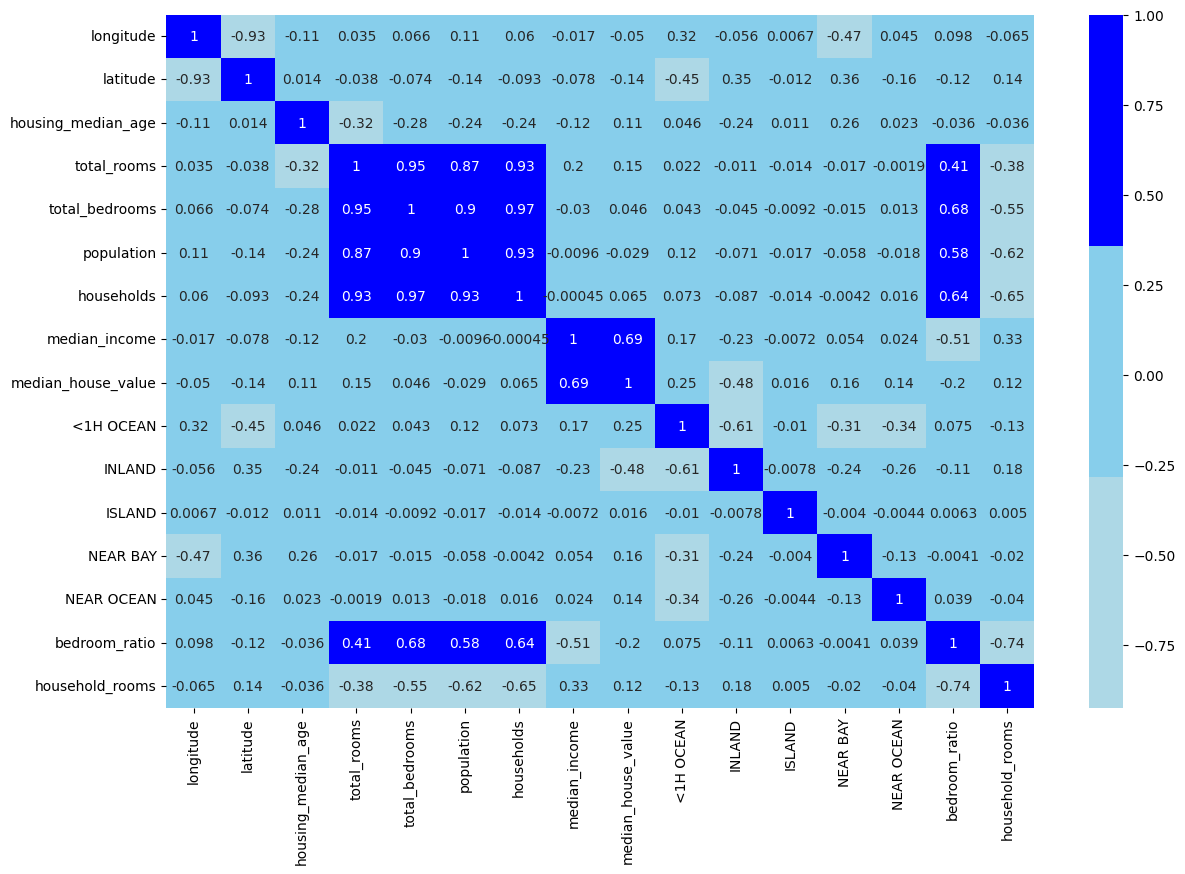

In [24]:
plt.figure(figsize=(14, 9))
sns.heatmap(train_data.corr(), annot=True, cmap=sns.color_palette(["lightblue", "skyblue", "blue"]))
plt.show()

**Linear Regression Model**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train , y_train = train_data.drop(['median_house_value'], axis = 1) , train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s , y_train)

LinearRegression()

In [26]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

dummy_variables = pd.get_dummies(test_data['ocean_proximity']).astype(int)
test_data = test_data.join(dummy_variables)
test_data = test_data.drop('ocean_proximity', axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [27]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20279,-119.20,34.18,27.0,6.943122,5.438079,6.663133,5.407172,4.2212,185400.0,0,0,0,0,1,0.783233,1.284058
5365,-118.39,34.04,45.0,7.644919,5.746203,6.727432,5.723585,7.3028,500001.0,1,0,0,0,0,0.751637,1.335687
725,-122.12,37.68,35.0,7.580189,6.184149,7.044905,6.107023,2.9500,148900.0,0,0,0,1,0,0.815830,1.241225
15680,-122.43,37.80,52.0,7.230563,5.777652,6.317165,5.666427,4.0417,500001.0,0,0,0,1,0,0.799060,1.276036
9932,-122.30,38.29,25.0,7.439559,6.059123,6.929517,5.991465,3.0404,142100.0,0,0,0,1,0,0.814447,1.241693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,-120.61,35.06,13.0,7.768533,6.045005,7.137278,5.942799,4.6167,273100.0,1,0,0,0,0,0.778140,1.307218
6444,-118.03,34.11,38.0,7.638680,5.891644,6.896694,5.808142,5.9175,416900.0,0,1,0,0,0,0.771291,1.315167
2928,-119.01,35.37,33.0,6.711740,5.204007,6.363028,5.153292,1.2469,46700.0,0,1,0,0,0,0.775359,1.302418
2646,-124.11,40.57,33.0,7.207119,5.459586,6.352629,5.468060,2.4896,74100.0,1,0,0,0,0,0.757527,1.318039


In [28]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18199,-122.02,37.40,35.0,7.761745,6.276643,7.297091,6.212606,4.3500,261000.0,1,0,0,0,0,0.808664,1.249354
12473,-121.47,38.58,43.0,8.244859,6.859615,7.303170,6.746412,2.3266,137500.0,0,1,0,0,0,0.831987,1.222110
20030,-119.03,36.08,19.0,7.812783,6.068426,6.947937,6.056784,3.2500,80600.0,0,1,0,0,0,0.776730,1.289923
2284,-119.76,36.78,30.0,8.718991,7.193686,7.926242,7.110696,2.1383,78800.0,0,1,0,0,0,0.825059,1.226180
11462,-117.99,33.67,19.0,8.245122,6.673298,7.482682,6.629363,4.6250,282200.0,1,0,0,0,0,0.809363,1.243728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,-118.08,33.89,37.0,7.050123,5.560682,6.889591,5.420535,3.2857,153600.0,1,0,0,0,0,0.788735,1.300632
3211,-119.66,36.34,32.0,7.199678,5.624018,6.756932,5.659482,2.6397,59700.0,0,1,0,0,0,0.781148,1.272144
8128,-118.16,33.79,25.0,8.605936,7.143618,8.010028,7.073270,3.2330,199100.0,0,0,0,0,1,0.830080,1.216684
8096,-118.21,33.81,45.0,7.434848,5.823046,7.135687,5.811141,3.6923,159700.0,0,0,0,0,1,0.783210,1.279413


In [29]:
x_test , y_test = test_data.drop(['median_house_value'], axis = 1) , test_data['median_house_value']

In [30]:
x_test_s = scaler.fit_transform(x_test)

In [31]:
reg.fit(x_test, y_test)

LinearRegression()

In [32]:
reg.score(x_test, y_test)

0.6800957744555012

In [33]:
reg.fit(x_test_s , y_test)

LinearRegression()

In [34]:
reg.score(x_test_s, y_test)

0.6796505045729779

**Random Forest Model**

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
forest.score(x_train, y_train)

0.9743278029291331

In [37]:
forest.score(x_test, y_test)

0.8194217777244601

In [38]:
forest.fit(x_test, y_test)

RandomForestRegressor()

In [39]:
forest.score(x_test, y_test)

0.9700488289612045

In [40]:
forest.fit(x_train_s, y_train)
forest.fit(x_test_s, y_test)

RandomForestRegressor()

In [41]:
forest.score(x_train_s, y_train)

0.7725044281842447

In [42]:
forest.score(x_test_s, y_test)

0.9701874589268068

**Grid Search with CrossValidation - Random Forest Model**

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 4, 8, 12, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit on the training data
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Use the best model to predict on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test score: ", test_score)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best parameters found:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best score found:  0.8108800060284214
Test score:  0.8197156372597822


In [59]:
best_model.score(x_train, y_train)

0.9593229124667549